# Image classfication based on Intel dataset
Dataset was provided by [kaggle](https://www.kaggle.com/puneet6060/intel-image-classification#20067.jpg)

This Data contains around 25k images of size 150x150 distributed under 6 categories.<br>
{ 'buildings' -> 0,<br>
'forest' -> 1,<br>
'glacier' -> 2,<br>
'mountain' -> 3,<br>
'sea' -> 4,<br>
'street' -> 5 }

In [ ]:
%matplotlib inline
import os
import numpy as np

# visualization
import seaborn as sns 
import matplotlib.pyplot as plt

In [ ]:
# keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # to load images from file
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K

Saving files from archive to ``data/`` and restructuring dirs

In [ ]:
train_dir = "./data/train"
test_dir = "./data/test"
pred_dir = "./data/pred"

In [41]:
# dimensions of our images.
img_width, img_height = 150, 150

# depends on settled backend
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

nb_train_samples = 14034
nb_validation_samples = 3000
epochs = 30
batch_size = 128

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
 
model.add(Conv2D(32, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(64, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(96, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Flatten())
model.add(Dense(192))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(6))
model.add(Activation('softmax'))

# compiling
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [42]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    )

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='sparse')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,  
    class_mode='sparse')

train_generator.class_indices

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [43]:
# fitting model
history = model.fit(train_generator, steps_per_epoch=nb_train_samples//batch_size, epochs=epochs,
                    validation_data=test_generator)

# saving model to h5 file to load it further
model.save_weights('cnn_model_weights.h5')

  ...
    to  
  ['...']
Train for 109 steps, validate for 24 steps
Epoch 1/30
109/109 [==============================] - 258s 2s/step - loss: 1.2571 - accuracy: 0.4843 - val_loss: 1.1047 - val_accuracy: 0.5753
Epoch 2/30
109/109 [==============================] - 275s 3s/step - loss: 0.9500 - accuracy: 0.6358 - val_loss: 0.7543 - val_accuracy: 0.7327
Epoch 3/30
109/109 [==============================] - 288s 3s/step - loss: 0.8235 - accuracy: 0.6962 - val_loss: 0.8726 - val_accuracy: 0.6860
Epoch 4/30
109/109 [==============================] - 285s 3s/step - loss: 0.7221 - accuracy: 0.7420 - val_loss: 0.6131 - val_accuracy: 0.7893
Epoch 5/30
109/109 [==============================] - 280s 3s/step - loss: 0.6587 - accuracy: 0.7663 - val_loss: 0.6064 - val_accuracy: 0.7883
Epoch 6/30
109/109 [==============================] - 288s 3s/step - loss: 0.6205 - accuracy: 0.7823 - val_loss: 0.5142 - val_accuracy: 0.8250
Epoch 7/30
109/109 [==============================] - 285s 3s/step - loss:

In [245]:
model.summary()
model.save('cnn_model.h5')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            multiple                  2432      
_________________________________________________________________
activation_10 (Activation)   multiple                  0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 multiple                  0         
_________________________________________________________________
conv2d_7 (Conv2D)            multiple                  51264     
_________________________________________________________________
activation_11 (Activation)   multiple                  0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 multiple                  0         
_________________________________________________________________
conv2d_8 (Conv2D)            multiple                 

In [45]:
eval = model.evaluate(test_generator)

  ...
    to  
  ['...']
24/24 [==============================] - 10s 437ms/step - loss: 0.4049 - accuracy: 0.8700


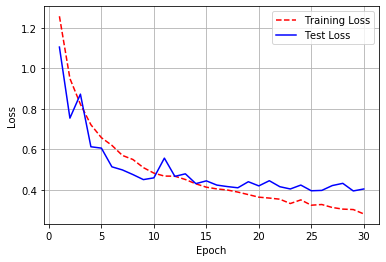

In [46]:
# Get training and test loss histories
training_loss = history.history['loss'][:]
test_loss = history.history['val_loss'][:]

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show();

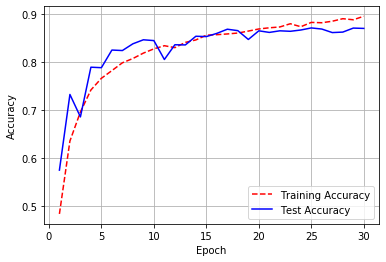

In [47]:
# Get training and test loss histories
training_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_acc) + 1)

# Visualize loss history
plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, test_acc, 'b-')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [85]:
class_dict = train_generator.class_indices
class_dict

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [86]:
# classes labels 
labels = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [49]:
def get_label_name(encoded_label, class_dict):
    return [class_name for class_name, indice in class_dict.items() if indice == encoded_label][0]

In [50]:
paths = [pred_dir + "/" + p for p in os.listdir(pred_dir)]

In [99]:
from tensorflow.keras.preprocessing import image
IMG_SIZE = 150

def predict_image(model, path, size):
    test_image= image.load_img(image_path, target_size=size) 
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    return test_image, result

In [171]:
def plot_value_array(result, class_dict):
    predictions_array, true_label = result[0], get_label_name(np.argmax(result[0]), class_dict)
    plt.grid(False)
    plt.xticks(range(len(labels)), labels=labels, rotation=90)
    plt.yticks(np.arange(0, 1.3, 0.2))
    thisplot = plt.bar(labels, predictions_array, color="#777777")
    plt.ylim([0, 1])
    plt.axis('on')
    predicted_label = labels[np.argmax(predictions_array)]
    thisplot[np.argmax(predictions_array)].set_color('green')

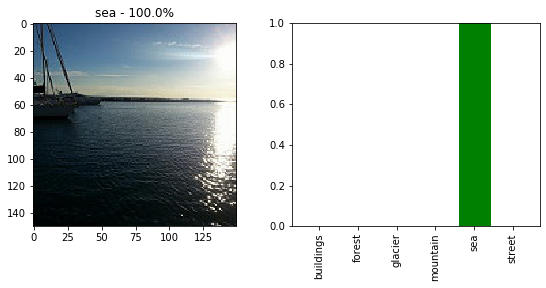

In [237]:
# select random picture and plot predictions of labels
import random

image_path = random.choice(paths)
test_image, result = predict_image(model, image_path, (IMG_SIZE, IMG_SIZE))
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title('{0} - {1}%'.format(get_label_name(np.argmax(result[0]), class_dict),
                              np.round(max(result[0])*100.0, 3)))
plt.imshow(test_image[0]/256.0)
plt.subplot(1,2,2)
plot_value_array(result, class_dict)
plt.tight_layout()
plt.show()

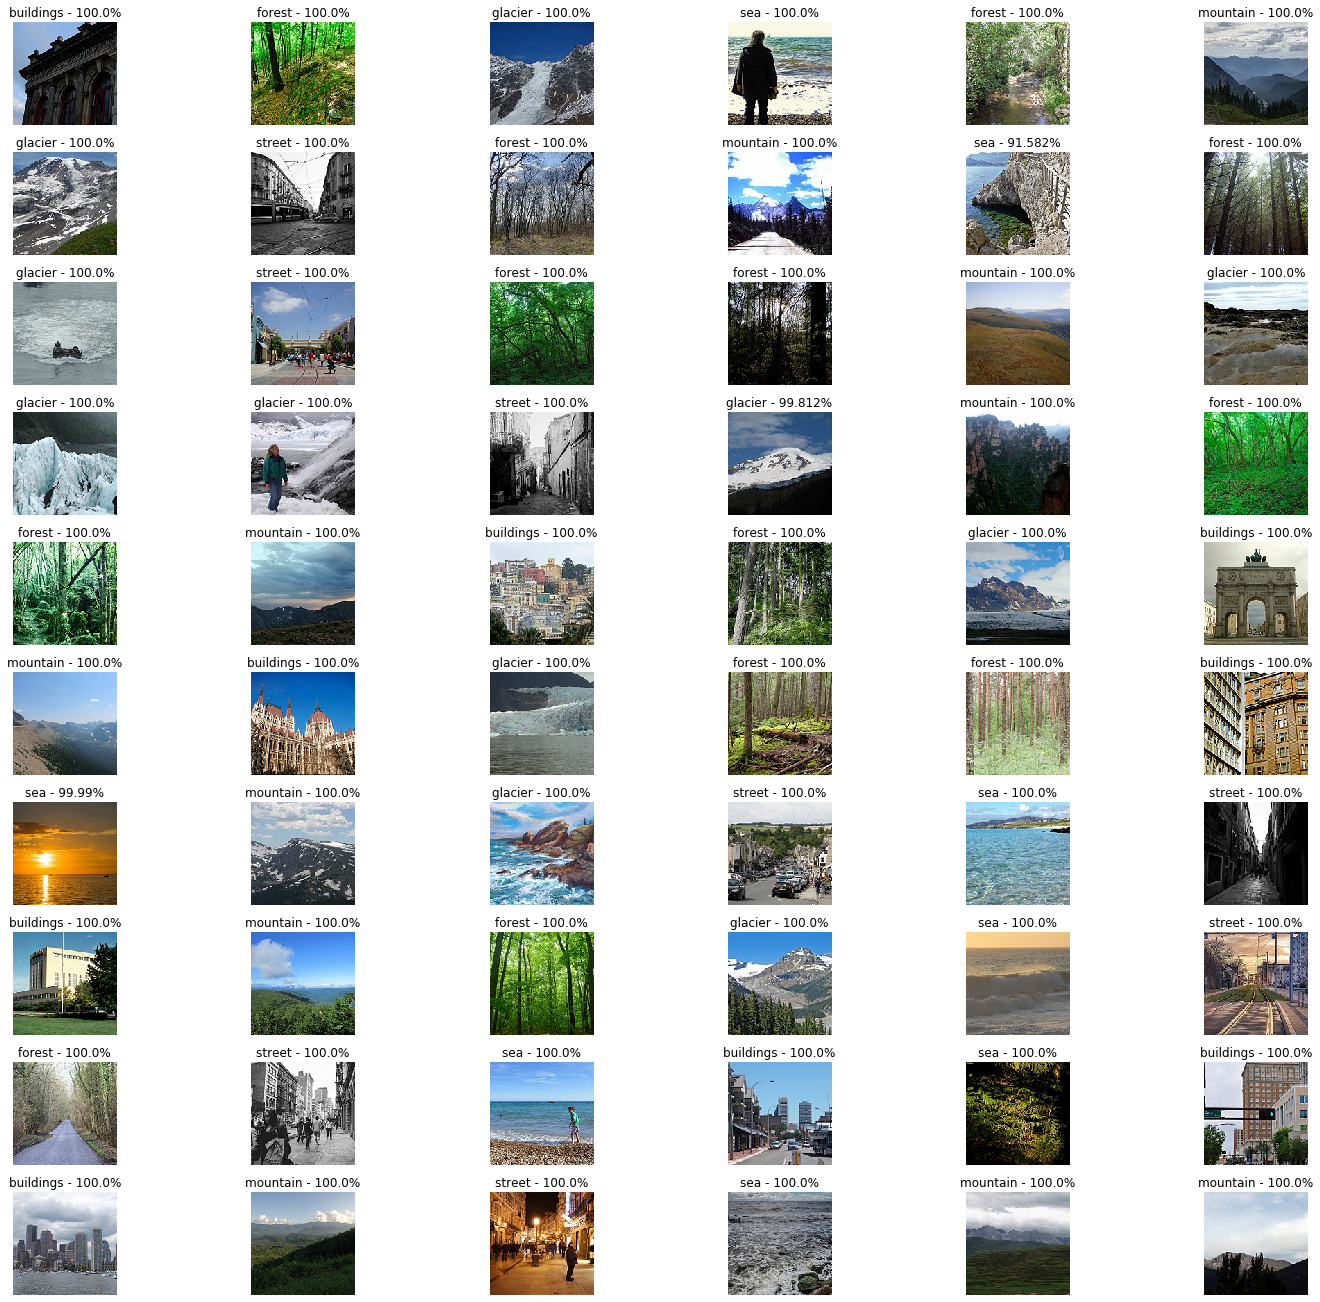

In [235]:
# testing on additional image set by Intel
plt.figure(figsize=(20, 20))
columns = 6
samples_batch = 30
for i, image_path in enumerate(paths[2*samples_batch:4*samples_batch]):    
    test_image, result = predict_image(model, image_path, (IMG_SIZE, IMG_SIZE))
    plt.subplot(2*samples_batch / columns + 1, columns, i + 1)
    plt.title('{0} - {1}%'.format(get_label_name(np.argmax(result[0]), class_dict),
                              np.round(max(result[0])*100.0, 3)))
    plt.imshow(test_image[0]/256.0)
    plt.axis('off')
plt.tight_layout()
plt.show()

## Testing on alternative __house dataset__ from [kaggle](https://www.kaggle.com/ted8080/house-prices-and-images-socal)

In [247]:
loaded_model = load_model('./trained_model/intel_model.h5', custom_objects=None, compile=True)

./test_images/3530.jpg


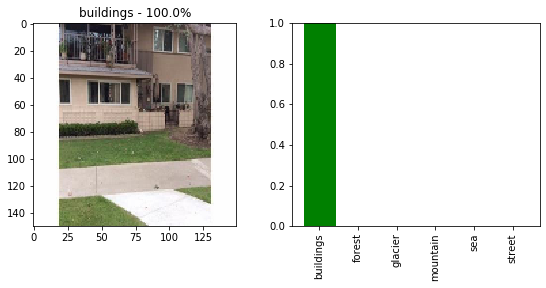

In [258]:
# trying to work with other images sized not (150, 150)
stock_dir_path = './test_images'
    
stock_paths = [stock_dir_path + "/" + p for p in os.listdir(stock_dir_path)]
image_path = random.choice(stock_paths)
print(image_path)
test_image, result = predict_image(model, image_path, (IMG_SIZE, IMG_SIZE))
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title('{0} - {1}%'.format(get_label_name(np.argmax(result[0]), class_dict),
                              np.round(max(result[0])*100.0, 8)))
plt.imshow(test_image[0]/256.0)
plt.subplot(1,2,2)
plot_value_array(result, class_dict)
plt.tight_layout()
plt.show()

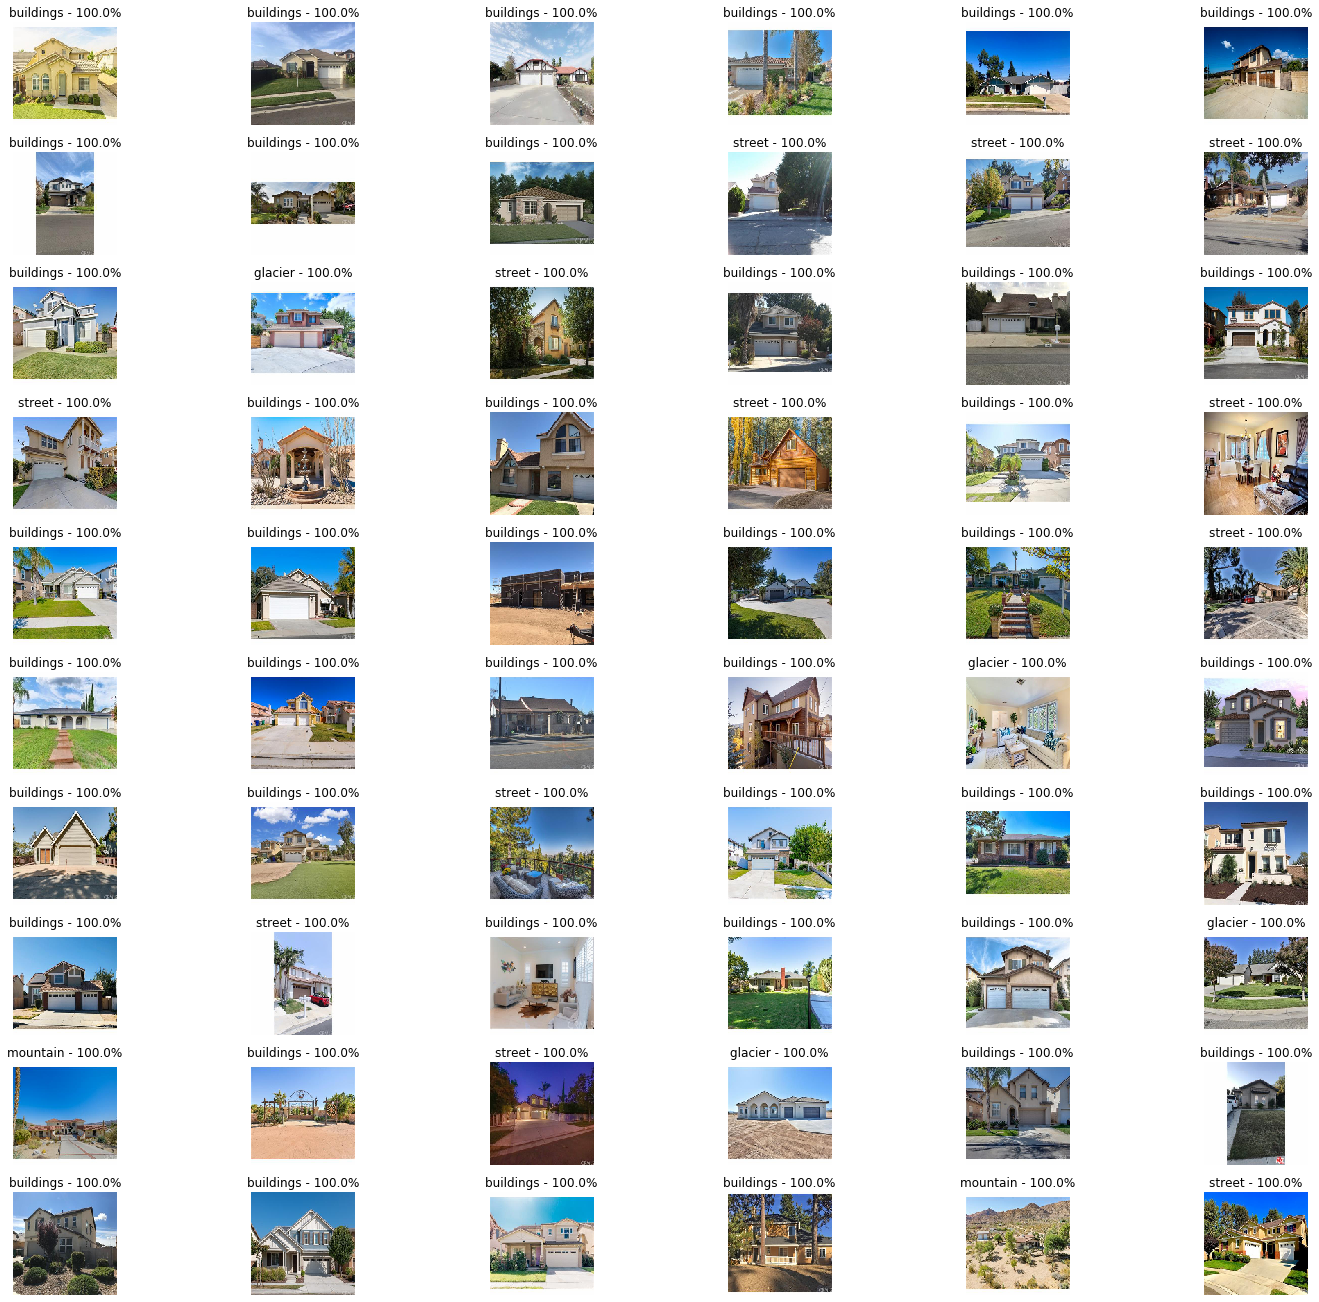

In [250]:
plt.figure(figsize=(20, 20))
columns = 6
samples_batch = 30
for i, image_path in enumerate(stock_paths[2*samples_batch:4*samples_batch]):    
    test_image, result = predict_image(loaded_model, image_path, (IMG_SIZE, IMG_SIZE))
    plt.subplot(2*samples_batch / columns + 1, columns, i + 1)
    plt.title('{0} - {1}%'.format(get_label_name(np.argmax(result[0]), class_dict),
                              np.round(max(result[0])*100.0, 3)))
    plt.imshow(test_image[0]/256.0)
    plt.axis('off')
plt.tight_layout()
plt.show()